In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [2]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-17 10:01:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   161MB/s    in 0.6s    

2024-03-17 10:01:15 (161 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1


In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-qf8tzv21
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-qf8tzv21
  Resolved https://github.com/ersilia-os/ersilia.git to commit ccb1b6a40db9ecb00611a11f5568fbcc256a3bb8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 58 kB 4.7 MB/s 
     |████████████████████████████████| 9.9 MB 36.3 MB/s 
     |████████████████████████████████| 139 kB 60.7 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 670 kB 49.8 MB/s 
     |████████████████████████████████| 78 kB 6.1 MB/s 
     |████████████████████████████████| 421 kB 15.3 MB/s 
     |████████████████████████████████| 148 kB 32.3 MB/s 
     |████████████████████████████████| 4.3 MB 40.2 MB/s 
     |████████████████████████████████| 62 kB 750 kB/s 
     |████████

In [4]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
import sys

In [6]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [7]:
## Mount google drive
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
# specifying my input folder

input_folder = "/content/drive/MyDrive/Ersilia"

In [10]:
#downloading a sample dataset
#!wget "https://raw.githubusercontent.com/ersilia-os/ersilia/master/notebooks/eml_canonical.csv"

In [11]:
# specifying my output folder

output_folder = "/content/drive/MyDrive/Ersilia"

Download and run the selected model from Ersilia and make sure it works

In [12]:
model_name = "eos6oli"

Fetching the model

In [13]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-6zf12xxq
Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_g

Serving the model

In [47]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:35339
   PID: 6198
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


Running Predictions for a sample dataset

In [15]:
# specifying the name of my input csv file

input_filename = "eml_canonical"

In [16]:
# specifying the SMILES column name
smiles_column = "can_smiles"

In [17]:
# Extracting SMILES to a list
import pandas as pd

In [27]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 442 SMILES


In [28]:
smiles

['Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1',
 'C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC=C2c1cccnc1',
 'CC(=O)Nc1nnc(S(N)(=O)=O)s1',
 'CC(=O)O',
 'CC(=O)N[C@@H](CS)C(=O)O',
 'CC(=O)Oc1ccccc1C(=O)O',
 'Nc1nc(=O)c2ncn(COCCO)c2[nH]1',
 'O=C(O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs1)c1cccs1',
 'CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1',
 'CCCSc1ccc2nc(NC(=O)OC)[nH]c2c1',
 'O=c1ncnc2[nH][nH]cc1-2',
 'CC(=O)Nc1c(I)c(NC(C)=O)c(I)c(C(=O)O)c1I',
 'NCC[C@H](O)C(=O)N[C@@H]1C[C@H](N)[C@@H](O[C@H]2O[C@H](CN)[C@@H](O)[C@H](O)[C@H]2O)[C@H](O)[C@H]1O[C@H]1O[C@H](CO)[C@@H](O)[C@H](N)[C@H]1O',
 'NC(N)=NC(=O)c1nc(Cl)c(N)nc1N',
 'CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1',
 'CN(C)CCC=C1c2ccccc2CCc2ccccc21',
 'CCOC(=O)C1=C(COCCN)NC(C)=C(C(=O)OC)C1c1ccccc1Cl',
 'CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O',
 'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O.O.O.O',
 'C[C@@H]1OC(=O)C[C@H](O)C[C@H](O)CC[C@@H](O)[C@H](O)C[C@H](O)C[C@]2(O)C[C@H]

Preprocessing: Checking if SMILES are in standard form

In [21]:
import rdkit
from rdkit import Chem

def is_smiles(smiles):
  try:
    mol=Chem.MolFromSmiles(smiles)
    if mol is None:
      return False
    return True
  except:
    return False

In [26]:
#example
smiles="Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1"
if is_smiles(smiles):
  print("Valid SMILES")
else:
  print("Not a valid SMILES")

Valid SMILES


In [29]:
for i in smiles:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")

Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

[10:14:45] WARNING: not removing hydrogen atom without neighbors
[10:14:45] WARNING: not removing hydrogen atom without neighbors
[10:14:45] WARNING: not removing hydrogen atom without neighbors



Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILE

[10:14:45] WARNING: not removing hydrogen atom without neighbors
[10:14:46] WARNING: not removing hydrogen atom without neighbors


In [30]:
 #Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 34.79 seconds


In [31]:
# Checking the results

print(output.head())

                           key  \
0  MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1  GZOSMCIZMLWJML-VJLLXTKPSA-N   
2  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3  QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4  PWKSKIMOESPYIA-BYPYZUCNSA-N   

                                               input  solubility  
0      Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1      -2.332  
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      -5.090  
2                         CC(=O)Nc1nnc(S(N)(=O)=O)s1      -1.242  
3                                            CC(=O)O       1.229  
4                            CC(=O)N[C@@H](CS)C(=O)O      -0.308  


In [32]:
#Saving the results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

In [33]:
#reading the result in
eos6oli=pd.read_csv("/content/drive/MyDrive/Ersilia/eos6oli_output.csv")
eos6oli.head()

,key,input,solubility
0,MCGSCOLBFJQGHM-SCZZXKLOSA-N,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,-2.332
1,GZOSMCIZMLWJML-VJLLXTKPSA-N,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,-5.090
2,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-1.242
3,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.229
4,PWKSKIMOESPYIA-BYPYZUCNSA-N,CC(=O)N[C@@H](CS)C(=O)O,-0.308


In [34]:
#matching the smiles with the drug names

import pandas as pd
# Merge dataframes on the common column "can_smiles"
merged_df = pd.merge(eos6oli, df[['can_smiles', 'drugs']], how='left', left_on='input', right_on='can_smiles')

# Drop the redundant "can_smiles" column
merged_df.drop('can_smiles', axis=1, inplace=True)

print(merged_df)


                             key  \
0    MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1    GZOSMCIZMLWJML-VJLLXTKPSA-N   
2    BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3    QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4    PWKSKIMOESPYIA-BYPYZUCNSA-N   
..                           ...   
453  QTXVAVXCBMYBJW-UHFFFAOYSA-N   
454  HUCJFAOMUPXHDK-UHFFFAOYSA-N   
455  HBOMLICNUCNMMY-XLPZGREQSA-N   
456  NWONKYPBYAMBJT-UHFFFAOYSA-L   
457  FUXFIVRTGHOMSO-UHFFFAOYSA-N   

                                                 input  solubility  \
0        Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1      -2.332   
1    C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      -5.090   
2                           CC(=O)Nc1nnc(S(N)(=O)=O)s1      -1.242   
3                                              CC(=O)O       1.229   
4                              CC(=O)N[C@@H](CS)C(=O)O      -0.308   
..                                                 ...         ...   
453              CC(=O)CC(c1ccccc1)c1c(O)oc2ccccc2c1=O      -4.905   
454    

In [35]:
#saving the output
merged_df.to_csv("/content/drive/MyDrive/Ersilia/merged_data.csv", index=False)

Making Predictions with 1000 molecules downloaded from Harvard Dataverse

Exploratory Data Analysis

In [36]:
import pandas as pd
Agsoldb=pd.read_csv("/content/drive/MyDrive/Ersilia/curated-solubility-dataset.csv")
Agsoldb.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [37]:
Agsoldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [38]:
#checking for missing values
Agsoldb.isnull().sum()

ID                     0
Name                   0
InChI                  0
InChIKey               0
SMILES                 0
Solubility             0
SD                     0
Ocurrences             0
Group                  0
MolWt                  0
MolLogP                0
MolMR                  0
HeavyAtomCount         0
NumHAcceptors          0
NumHDonors             0
NumHeteroatoms         0
NumRotatableBonds      0
NumValenceElectrons    0
NumAromaticRings       0
NumSaturatedRings      0
NumAliphaticRings      0
RingCount              0
TPSA                   0
LabuteASA              0
BalabanJ               0
BertzCT                0
dtype: int64

In [39]:
#saving 1000 molecules into another csv file
# Shuffling the DataFrame
Agsoldb_shuffled = Agsoldb.sample(frac=1).reset_index(drop=True)

# Selecting the first 1000 rows from the shuffled DataFrame
molecules=Agsoldb_shuffled.head(1000)

In [ ]:
molecules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1000 non-null   object 
 1   Name                 1000 non-null   object 
 2   InChI                1000 non-null   object 
 3   InChIKey             1000 non-null   object 
 4   SMILES               1000 non-null   object 
 5   Solubility           1000 non-null   float64
 6   SD                   1000 non-null   float64
 7   Ocurrences           1000 non-null   int64  
 8   Group                1000 non-null   object 
 9   MolWt                1000 non-null   float64
 10  MolLogP              1000 non-null   float64
 11  MolMR                1000 non-null   float64
 12  HeavyAtomCount       1000 non-null   float64
 13  NumHAcceptors        1000 non-null   float64
 14  NumHDonors           1000 non-null   float64
 15  NumHeteroatoms       1000 non-null   fl

In [40]:
molecules.to_csv("/content/drive/MyDrive/Ersilia/1000molecules.csv", index=False)

In [41]:
input_folder = "/content/drive/MyDrive/Ersilia"

In [42]:
input_filename = "1000molecules"

In [43]:
smiles_column = "SMILES"

In [44]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 1000 SMILES


In [45]:
for i in smiles:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")

Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

In [48]:
#making predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 58.72 seconds


In [49]:
output

,key,input,solubility
0,RRTKVYSLIGQWCO-UHFFFAOYSA-N,CN1C(=O)N(C)c2nncnc2C1=O,-1.335
1,SIULLDWIXYYVCU-UHFFFAOYSA-N,O=C(Nc(ccc(c1)I)c1)C,-2.673
2,SIZDUQQDBXJXLQ-UHFFFAOYSA-N,CC(=O)C1CC(CC(O)=O)C1(C)C,-1.314
3,HSMVPDGQOIQYSR-UHFFFAOYSA-N,CCCOCC(=NC1=C(C(F)(F)F)C=C(Cl)C=C1)N1C=CN=C1,-4.815
4,PLAZXGNBGZYJSA-UHFFFAOYSA-N,CCn1c2ccccc2c3ccccc13,-3.468
...,...,...,...
995,KMXPZGOJCXKDSG-UHFFFAOYSA-N,CCCCCCCCCC1(CC)C(=O)NC(=O)NC1=O,-3.773
996,VAYGXNSJCAHWJZ-UHFFFAOYSA-N,CO[S](=O)(=O)OC,0.165
997,LRNJHZNPJSPMGK-UHFFFAOYSA-N,CCO[P](=S)(Oc1ccc(cc1)C#N)c2ccccc2,-6.035
998,WNZQDUSMALZDQF-UHFFFAOYSA-N,O=C1OCc2ccccc12,-1.572


In [50]:
molecules=molecules.rename(columns={'Solubility': 'actual_solubility'})
output=output.rename(columns={'solubility': 'predicted_solubility'})

In [51]:
molecules.head()

,ID,Name,InChI,InChIKey,SMILES,actual_solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,B-987,fervenulin,InChI=1S/C7H7N5O2/c1-11-5-4(8-3-9-10-5)6(13)12...,RRTKVYSLIGQWCO-UHFFFAOYSA-N,CN1C(=O)N(C)c2nncnc2C1=O,-1.984900,0.00000,1,G1,193.166,...,0.0,72.0,2.0,0.0,0.0,2.0,82.67,77.652633,3.190149,611.486756
1,E-677,4-iodoacetanilide,InChI=1S/C8H8INO/c1-6(11)10-8-4-2-7(9)3-5-8/h2...,SIULLDWIXYYVCU-UHFFFAOYSA-N,O=C(Nc(ccc(c1)I)c1)C,-3.250000,0.23500,2,G3,261.062,...,1.0,58.0,1.0,0.0,0.0,1.0,29.10,79.134510,2.736298,255.299498
2,B-968,"cyclobutaneacetic acid, 3-acetyl-2,2-dimethyl-",InChI=1S/C10H16O3/c1-6(11)8-4-7(5-9(12)13)10(8...,SIZDUQQDBXJXLQ-UHFFFAOYSA-N,CC(=O)C1CC(CC(O)=O)C1(C)C,-0.575200,0.00000,1,G1,184.235,...,3.0,74.0,0.0,1.0,1.0,1.0,54.37,78.135177,2.585646,242.554413
3,F-1072,N-[4-chloro-2-(trifluoromethyl)phenyl]-1-imida...,InChI=1S/C15H15ClF3N3O/c1-2-7-23-9-14(22-6-5-2...,HSMVPDGQOIQYSR-UHFFFAOYSA-N,CCCOCC(=NC1=C(C(F)(F)F)C=C(Cl)C=C1)N1C=CN=C1,-4.440000,1.49905,2,G2,345.752,...,5.0,124.0,2.0,0.0,0.0,2.0,39.41,136.125670,2.422464,669.101780
4,A-2270,9-ethyl-9H-carbazole,InChI=1S/C14H13N/c1-2-15-13-9-5-3-7-11(13)12-8...,PLAZXGNBGZYJSA-UHFFFAOYSA-N,CCn1c2ccccc2c3ccccc13,-6.813503,0.00000,1,G1,195.265,...,1.0,74.0,3.0,0.0,0.0,3.0,4.93,88.943748,2.616909,566.107093


In [52]:
output.head()

,key,input,predicted_solubility
0,RRTKVYSLIGQWCO-UHFFFAOYSA-N,CN1C(=O)N(C)c2nncnc2C1=O,-1.335
1,SIULLDWIXYYVCU-UHFFFAOYSA-N,O=C(Nc(ccc(c1)I)c1)C,-2.673
2,SIZDUQQDBXJXLQ-UHFFFAOYSA-N,CC(=O)C1CC(CC(O)=O)C1(C)C,-1.314
3,HSMVPDGQOIQYSR-UHFFFAOYSA-N,CCCOCC(=NC1=C(C(F)(F)F)C=C(Cl)C=C1)N1C=CN=C1,-4.815
4,PLAZXGNBGZYJSA-UHFFFAOYSA-N,CCn1c2ccccc2c3ccccc13,-3.468


In [53]:
output.to_csv("/content/drive/MyDrive/Ersilia/1000predictions.csv", index=False)

In [54]:
#matching outputs with drug names
import pandas as pd
# Merge dataframes on the common column "smiles"
predictions = pd.merge(output, molecules[['SMILES', 'actual_solubility']], how='left', left_on='input', right_on='SMILES')

# Drop the redundant "smiles" column
predictions.drop('SMILES', axis=1, inplace=True)


print(predictions)

                             key  \
0    RRTKVYSLIGQWCO-UHFFFAOYSA-N   
1    SIULLDWIXYYVCU-UHFFFAOYSA-N   
2    SIZDUQQDBXJXLQ-UHFFFAOYSA-N   
3    HSMVPDGQOIQYSR-UHFFFAOYSA-N   
4    PLAZXGNBGZYJSA-UHFFFAOYSA-N   
..                           ...   
995  KMXPZGOJCXKDSG-UHFFFAOYSA-N   
996  VAYGXNSJCAHWJZ-UHFFFAOYSA-N   
997  LRNJHZNPJSPMGK-UHFFFAOYSA-N   
998  WNZQDUSMALZDQF-UHFFFAOYSA-N   
999  BTNXBLUGMAMSSH-UHFFFAOYSA-N   

                                            input  predicted_solubility  \
0                        CN1C(=O)N(C)c2nncnc2C1=O                -1.335   
1                            O=C(Nc(ccc(c1)I)c1)C                -2.673   
2                       CC(=O)C1CC(CC(O)=O)C1(C)C                -1.314   
3    CCCOCC(=NC1=C(C(F)(F)F)C=C(Cl)C=C1)N1C=CN=C1                -4.815   
4                           CCn1c2ccccc2c3ccccc13                -3.468   
..                                            ...                   ...   
995               CCCCCCCCCC1(CC)C(=O)NC(=

In [55]:
predictions.to_csv("/content/drive/MyDrive/Ersilia/predictions.csv", index=False)

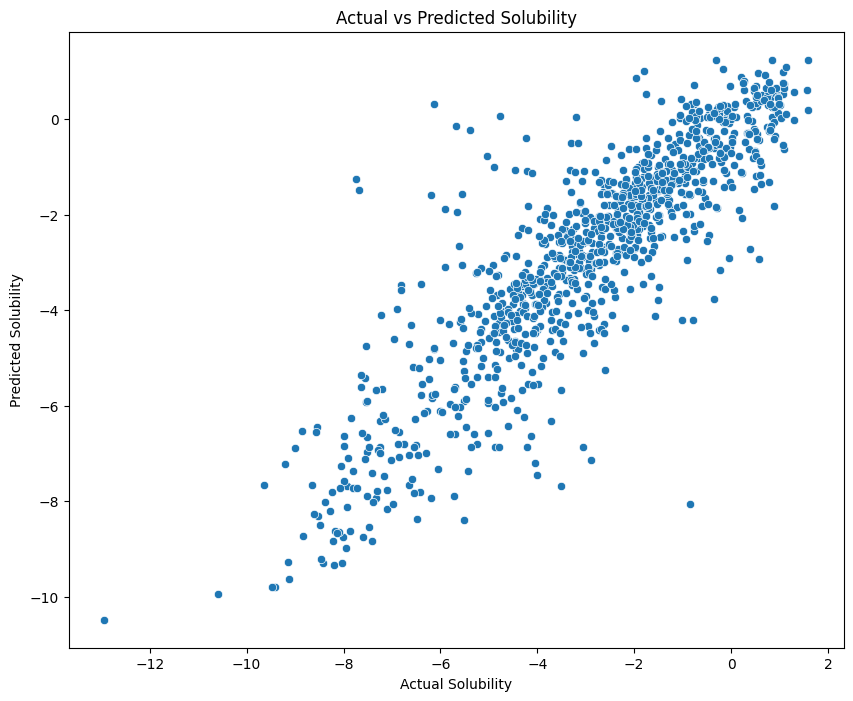

In [56]:
#a scatter plot of predictions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='actual_solubility', y='predicted_solubility', data=predictions)
plt.title('Actual vs Predicted Solubility')
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesScatter_plot.png')
plt.show()

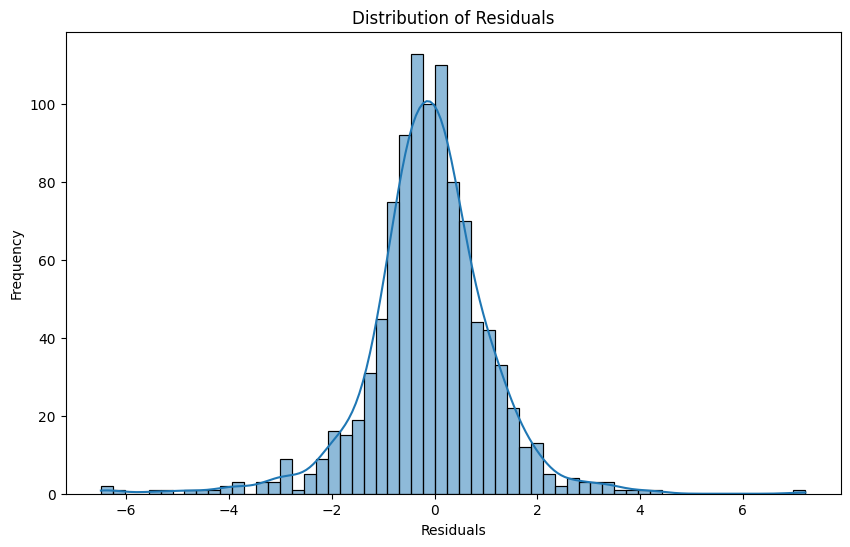

In [57]:
# Calculate residuals
predictions['Residuals'] = predictions['actual_solubility'] - predictions['predicted_solubility']

# Create histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(predictions['Residuals'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesResidual_plot.png')
plt.show()

In [58]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(predictions['actual_solubility'], predictions['predicted_solubility'])
mse = mean_squared_error(predictions['actual_solubility'], predictions['predicted_solubility'])
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')


MAE: 0.84
